# SHL Predictions

This model will be based on two datasets:
1. "shl_clean.csv", which contains stats on how many goals each team scores and give up both home and away. This data has been cleaned from the raw data dat was contracted from https://stats.swehockey.se/ScheduleAndResults/Schedule/10371. The pyhton file used for cleaning can be found at this projects page at my github page
2. "games.csv", which contains all the games of the previous SHl season. Also cleaned from the same raw data as mentioned above

To calculate the probabilities of various results I used a Poission regresion. How I later built the model will be described further down in this Notebook

## Imports

In [501]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
import seaborn as sns
import random, statistics

df = pd.read_csv("shl_clean.csv")
df = df.iloc[:,1:]
df.set_index("team", inplace = True)
games = pd.read_csv("games.csv")
games = games.iloc[:,1:]
schedule = games.iloc[:,:2]

### Datasets

This is how the dataframes look like.

In [149]:
df.head()

,home_goals,home_ga,away_ga,away_goals,home_max,home_ga_max,away_ga_max,away_max,home_avg,away_avg,home_ga_avg,away_ga_avg
team,,,,,,,,,,,,
Brynäs IF,74,69,99,58,6,6,8,6,2.846154,2.230769,2.653846,3.807692
Djurgårdens IF,85,54,81,52,6,6,7,5,3.269231,2.000000,2.076923,3.115385
Frölunda HC,91,54,72,63,8,5,5,6,3.500000,2.423077,2.076923,2.769231
Färjestad BK,99,58,88,74,12,6,8,7,3.807692,2.846154,2.230769,3.384615
HV 71,87,64,66,71,8,6,6,4,3.346154,2.730769,2.461538,2.538462


In [457]:
games.head()

,home,away,home_goals,away_goals,tie?
0,Frölunda HC,Brynäs IF,2,5,n
1,Skellefteå AIK,IK Oskarshamn,5,4,y
2,Leksands IF,IF Malmö Redhawks,5,2,n
3,Djurgårdens IF,Linköping HC,4,2,n
4,Färjestad BK,Örebro HK,4,6,n


In [266]:
schedule.head()

,home,away
0,Frölunda HC,Brynäs IF
1,Skellefteå AIK,IK Oskarshamn
2,Leksands IF,IF Malmö Redhawks
3,Djurgårdens IF,Linköping HC
4,Färjestad BK,Örebro HK


## Test

In order to find all the variables for my model I need to test some code. I started by hardcoding and eventuelly work my way into a more and more dynamic model

In [134]:
#Poisson, probability of Färjestad BK to score 0-12 goals at home
prob_goals_fbk = [poisson.pmf(i, 3.807692) for i in range(12+1)]
print(prob_goals_fbk)

[0.022199355989648038, 0.08452831020693492, 0.16092888527423221, 0.20425587634253742, 0.19443586657561712, 0.14807037873460893, 0.09396773275745686, 0.051114312039815174, 0.024328444629938474, 0.010292802665539977, 0.003919182236715519, 0.001356639895389437, 0.00043047223971293456]


In [145]:
#Poisson, probability of HV71 to score 0-8 goals at home
prob_goals_hv = [poisson.pmf(i, 3.346154) for i in range(8+1)]
print(prob_goals_hv)

[0.035219548338589875, 0.11785003255136588, 0.1971721789109415, 0.21992282505052088, 0.18397391018352507, 0.12312100709124862, 0.06866364172706833, 0.032822731345656615, 0.01372873922289928]


In [136]:
#filtering only certain teams (in this case the home games of "Färjestad BK")
games.loc[games["home"] == "Färjestad BK"]

,home,away,home_goals,away_goals
4,Färjestad BK,Örebro HK,4,6
15,Färjestad BK,Växjö Lakers HC,4,2
29,Färjestad BK,IF Malmö Redhawks,4,3
50,Färjestad BK,IK Oskarshamn,12,0
56,Färjestad BK,Leksands IF,6,4
75,Färjestad BK,Rögle BK,5,3
76,Färjestad BK,Luleå HF,2,3
93,Färjestad BK,HV 71,3,2
111,Färjestad BK,Djurgårdens IF,4,1
114,Färjestad BK,Brynäs IF,2,1


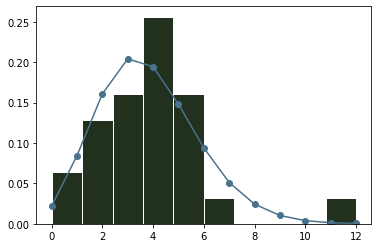

In [142]:
# Plot histogram of actual goals at home for Färjestad vs. poission
plt.hist(games.loc[games["home"] == "Färjestad BK"]["home_goals"], edgecolor="white", density = True, color = "#22311d")
plt.plot(prob_goals_fbk,marker = "o", label = "FBK", color = "#49738C")
plt.show()

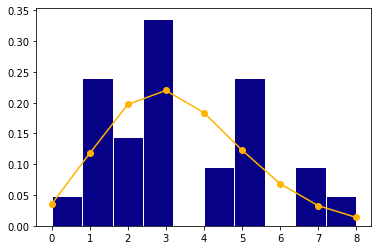

In [164]:
# Plot histogram of actual goals at home for HV71 vs. poission
plt.hist(games.loc[games["home"] == "HV 71"]["home_goals"], edgecolor="white", density = True, color = "#060187")
plt.plot(prob_goals_hv,marker = "o", label = "HV71", color = "#ffb300")
plt.show()

# Building a dynamic model

There are certain aspects that usually have an affect on a hockey game. A team who plays at home usually have an advantage. Hence, I seperated the goals scored for the various team on home and away ice. For the Poission regression I used the maximum amount of goals scored by each individual team at home/away as the range parameter. Then I used the average amount of goals scored at home/away by a team as the other factor in the Poission calculations.

In [493]:
# What we need:
# Poisson calculation where the team and goal max is dynamic rather hand hard coded
def pois (df, team, max_g, avg_g):
    avg = df.loc[team, avg_g]
    ma = df.loc[team, max_g]
    pois = [poisson.pmf(i, avg) for i in range(ma+1)]
    return(pois)

The function above calculated the different probababilities of a team scoring x number of goals in a game. It would then return an array of these probabilities from 0 goals up to the maximum amount of that team.

Below I tested the function using the team "Färjestad BK" who managed to score 12 goals in one of their games last year. Hence, the output will be each probability of Färjestad scoring 0-12 goals (13 different values)

In [494]:
fbk = pois(df, "Färjestad BK", "home_max", "home_avg")
print(sum(fbk))
print(fbk)

0.9998282594556932
[0.022199349159078008, 0.08452829102879701, 0.16092886176636356, 0.20425586301115373, 0.19443586959715595, 0.14807039300091115, 0.09396774940442429, 0.051114325225483585, 0.02432845287174457, 0.010292806984199626, 0.0039191841978298576, 0.0013566406838641804, 0.00043047252468767324]


In [495]:
hv = pois(df, "HV 71", "home_max", "home_avg")
print(sum(hv))
print(hv)

0.9924746165339299
[0.03521955375698233, 0.11785004526374857, 0.1971721911143486, 0.21992282855061962, 0.1839739046529222, 0.12312099772926341, 0.06866363334901222, 0.03282272583167068, 0.013728736285362251]


### Test to show the probability of different results
To simulate a match I multiplies the values from the poission regression of one home team (Färjestad BK) and one away team (HV 71) and created different arrays for each home goal. For instance the probability of Färjestad scoring 1 goal multiplied by the probability of HV 71 would score 1 goal.

These arrays where then plotted into a heatmap get a good overview over the probabilites

In [496]:
home = pois(df, "Färjestad BK", "home_max", "home_avg")
away = pois(df, "HV 71", "away_max", "away_avg")

matrix = np.multiply.outer(home, away)
np.set_printoptions(suppress = True)
print(matrix)

[[0.001 0.004 0.005 0.005 0.003]
 [0.006 0.015 0.021 0.019 0.013]
 [0.01  0.029 0.039 0.036 0.024]
 [0.013 0.036 0.05  0.045 0.031]
 [0.013 0.035 0.047 0.043 0.029]
 [0.01  0.026 0.036 0.033 0.022]
 [0.006 0.017 0.023 0.021 0.014]
 [0.003 0.009 0.012 0.011 0.008]
 [0.002 0.004 0.006 0.005 0.004]
 [0.001 0.002 0.003 0.002 0.002]
 [0.    0.001 0.001 0.001 0.001]
 [0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.   ]]


In [236]:
print(np.sum(matrix))

0.8581478267227558


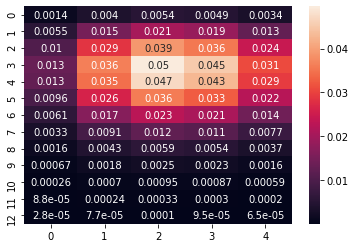

In [358]:
res = sns.heatmap(matrix, annot = True)

In order to later get the sum of all the propbabilities for a home win, away win and tie i needed to slice the array of all the resuts.

In [199]:
# Slice only the diagonal (tie)
np.diagonal(matrix)

array([0.001, 0.015, 0.039, 0.045, 0.029])

In [201]:
# Slice only the top diagonal (away team win)
np.triu(matrix, 1)

array([[0.   , 0.004, 0.005, 0.005, 0.003],
       [0.   , 0.   , 0.021, 0.019, 0.013],
       [0.   , 0.   , 0.   , 0.036, 0.024],
       [0.   , 0.   , 0.   , 0.   , 0.031],
       [0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   ]])

In [470]:
# Slice only the bottom diagonal (home team win)
print(np.sum(np.tril(matrix, -1)*100))

56.76760692055387


In [480]:
home_prob = np.sum(np.tril(matrix, -1))/np.sum(matrix)
away_prob = np.sum(np.triu(matrix, 1))/np.sum(matrix)
tie_prob = np.sum(np.diagonal(matrix))/np.sum(matrix)
res = random.randrange(1, 100)

print(home_prob)
print(away_prob)
print(tie_prob)
print(res)
print(np.sum((away_prob, tie_prob))*100)

if res > np.sum((away_prob, tie_prob), dtype=np.int32)*100:
    print("Home win!")
elif res > tie_prob*100:
    print("Away win!")
else:
    print("Tie")

0.6615131467191135
0.18684660235473652
0.15164025092614997
40
33.84868532808865
Home win!


## Build a function for simulating a game

When I had all the variables I needed and knew how to access them easily I could build a function for simulating a game. The input would be the stings, the home team and the away team.

At the moment I set the function to print the probabilities of a home win, away win or a tie. Later I will be develop this further to output the most likely results in order to backtrack a certain amount of games. or in the end simulate an entire season.

In [232]:
def sim_game(home_team, away_team):
    home = pois(home_team, "home_max", "home_avg")
    away = pois(away_team,"away_max", "away_avg")
    matrix = np.multiply.outer(home, away)   
    home_prob = np.sum(np.tril(matrix, -1))/np.sum(matrix)
    away_prob = np.sum(np.triu(matrix, 1))/np.sum(matrix)
    tie_prob = np.sum(np.diagonal(matrix))/np.sum(matrix)
    winner = max(home_prob, away_prob, tie_prob)
    print("The probability of {} winning is: {:.2%}".format(home_team, home_prob))
    print("The probability of {} winning is: {:.2%}".format(away_team, away_prob))
    print("The probability of a tie is: {:.2%}".format(tie_prob))
    

In [260]:
sim_game("Färjestad BK", "Brynäs IF")

The probability of Färjestad BK winning is: 67.31%
The probability of Brynäs IF winning is: 18.89%
The probability of a tie is: 13.80%


### Testing
Testing new version of the fuction in order to simulate several games

#### Version 1

In [344]:
def sim_game2(home_team, away_team):
    result = {}
    home = pois(home_team, "home_max", "home_avg")
    away = pois(away_team,"away_max", "away_avg")
    matrix = np.multiply.outer(home, away)   
    home_prob = np.sum(np.tril(matrix, -1))/np.sum(matrix)
    away_prob = np.sum(np.triu(matrix, 1))/np.sum(matrix)
    tie_prob = np.sum(np.diagonal(matrix))/np.sum(matrix)
    if home_prob == max(home_prob, away_prob, tie_prob):
        return home_team
    elif away_prob == max(home_prob, away_prob, tie_prob):
        return away_team
    else:
        return "Tie"
        

In [346]:
def sim_games():
    results = []
    for i in schedule.tail(7):
        h = schedule.home
        a = schedule.away
        winner = sim_game(h, a)
        print(winner)

In [347]:
test = schedule.tail(7)
results = []
for h, a in zip(test.iloc[:,0], test.iloc[:,1]):
    winner = sim_game2(h, a)
    print(winner)

Brynäs IF
Frölunda HC
Linköping HC
Luleå HF
Rögle BK
HV 71
Färjestad BK


Version 1: 5/7 correct (71,42%)

In [349]:
games.tail(7)

,home,away,home_goals,away_goals
357,Brynäs IF,Örebro HK,1,6
358,Frölunda HC,Djurgårdens IF,3,2
359,Linköping HC,IK Oskarshamn,3,1
360,Luleå HF,Skellefteå AIK,3,0
361,Rögle BK,IF Malmö Redhawks,5,2
362,Leksands IF,HV 71,5,2
363,Växjö Lakers HC,Färjestad BK,4,7


#### Version 2

In [537]:
def win(df, home_team, away_team):
    home = pois(df, home_team, "home_max", "home_avg")
    away = pois(df, away_team,"away_max", "away_avg")
    matrix = np.multiply.outer(home, away)
    home_prob = np.sum(np.tril(matrix, -1))/np.sum(matrix)
    away_prob = np.sum(np.triu(matrix, 1))/np.sum(matrix)
    tie_prob = np.sum(np.diagonal(matrix))/np.sum(matrix)
    res = random.randrange(1, 101)
    if res > (away_prob + tie_prob)*100:
        return home_team
    elif res > tie_prob*100:
        return away_team
    else:
        return "tie"

In [483]:
test = schedule.tail(7)
for h, a in zip(test.iloc[:,0], test.iloc[:,1]):
    winner = sim_game3(h, a)
    print(winner)

Örebro HK
Tie
Tie
Luleå HF
IF Malmö Redhawks
Tie
Växjö Lakers HC


Version 1: 5/7 correct (71,42%)

In [538]:
games["winner"] = games.apply(lambda x: "tie" if x["tie?"] == "y" else (x["home"] if x["home_goals"] > x["away_goals"] else x["away"]), axis=1)

test_2 = games.tail(7)

def sim_games(schedule, stat_data, num_sim):
    result = []
    sim_count = 0
    while sim_count < num_sim:
        for index, row in schedule.iterrows():
            h = row["home"]
            a = row['away']
            winner = win(stat_data, h, a)
            if winner == h:
                schedule.at[index,'sim_winner'] = h
            elif winner == a:
                schedule.at[index,'sim_winner'] = a
            else:
                schedule.at[index,'sim_winner'] = "tie"
            schedule["correct"] = schedule.apply(lambda x: 1 if x["winner"] == x["sim_winner"] else 0, axis = 1)
            accuracy = sum(schedule.correct)/len(schedule)
            result.append(accuracy)
            sim_count += 1
    return statistics.mean(result)

print("When simulating the last round a 1000 times the model has an average accuracy per round of {:.2%}!".format(sim_games(test_2, df, 1000)))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


When simulating the last round a 1000 times the model has an average accuracy per round of 43.19%!
